<a href="https://colab.research.google.com/github/Rishita32/RTX_Case_Study/blob/main/RTX_Case_Study_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Libraries

In [1]:
import numpy as np
import pandas as pd
pd.set_option('max_colwidth', 600)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.6)
import spacy
import random
from gensim import models, corpora, similarities
from wordcloud import WordCloud
from gensim.models import CoherenceModel

from google.colab import drive

# Load Dataset

In [2]:
drive.mount('/content/drive', force_remount=True)
df=pd.read_excel('drive/MyDrive/rtx_dataset.xlsx')

Mounted at /content/drive


In [3]:
df.head()

Job Function  \
0      Finance   
1      Finance   
2      Finance   
3      Finance   
4      Finance   

                                                                                                                                                                                                                                                                                                                                                                    Text Comment  \
0                                                                                                                                                                You are very much just a number at this company. It does not matter how long you have been there or what your skill base is, you are disposable. Management is very crooked and everyone is out for themselves.   
1                                                                                                                                                                           Promises, promises, promises that never came to fruition. Buyer beware if you have a book of business. They will bring you over, throw teams on your largest clients, and then try to smoke you out.   
2  The company is so focused on sales, that they tape scripts to your computer and you get reprimanded for not using them with every customer. That includes the daily regulars that are well aware of the company products available to them. Management is more sales focused, than proper management. Maintaining a balanced an efficient work environment is not a priority.   
3                              Having an open office with out any sound barriers makes it difficult to focus, pay increases are non existent - you are lucky to get a % every year and the culture is generally passive aggressive. Mid - level leadership is inconsistent - junior level senior leadership do not get a lot of support and are often a barrier to improvements.   
4                                                                                                                   It's a nightmare being a developer here. All of their workstations are super restricted. Have to go through weeks of approval process to even install dev tools that are not on the approved list. Most websites are banned. Not a fun place to be for devs.   

  Text Comment Sentiment  
0               Negative  
1               Negative  
2               Negative  
3               Negative  
4               Negative

# Data Preprocessing

In [4]:
# Load English language model
nlp = spacy.load("en_core_web_sm")

# Disable named-entity recognition and parsing to save time
unwanted_pipes = ["ner", "parser"]

def custom_tokenizer(doc):
    with nlp.disable_pipes(*unwanted_pipes):
        return [t.lemma_ for t in nlp(doc) if t.is_alpha and not t.is_space and not t.is_punct and not t.is_stop and t.pos_ in ["ADJ","NOUN","VERB"]]

In [5]:
data=list(df['Text Comment'])
data

['You are very much just a number at this company. It does not matter how long you have been there or what your skill base is, you are disposable. Management is very crooked and everyone is out for themselves.',
 'Promises, promises, promises that never came to fruition. Buyer beware if you have a book of business. They will bring you over, throw teams on your largest clients, and then try to smoke you out.',
 'The company is so focused on sales, that they tape scripts to your computer and you get reprimanded for not using them with every customer. That includes the daily regulars that are well aware of the company products available to them. Management is more sales focused, than proper management. Maintaining a balanced an efficient work environment is not a priority.',
 'Having an open office with out any sound barriers makes it difficult to focus, pay increases are non existent - you are lucky to get a % every year and the culture is generally passive aggressive. Mid - level leader

# Tokenization

In [6]:
# Tokenize data
tokenized_data = list(map(custom_tokenizer, nlp.pipe(data, n_process=4)))

# Print example
print(tokenized_data[0])

['number', 'company', 'matter', 'skill', 'base', 'disposable', 'management', 'crooked']


In [7]:
dct = corpora.Dictionary(tokenized_data)

# Bag of Words

In [8]:
# Bag-of-Words sparse matrix
bow = [dct.doc2bow(i) for i in tokenized_data]

# Latent Dirichlet Allocation (LDA) Model

In [9]:
# Train LDA model
lda_model = models.LdaModel(
    corpus=bow,
    num_topics=10,
    passes=20,
    alpha='auto',
    eta='auto',
    id2word=dct,
    random_state=0
  )

In [10]:
# Print generated topics
lda_model.print_topics()

[(0,
  '0.038*"bank" + 0.036*"college" + 0.027*"financial" + 0.024*"investment" + 0.016*"graduate" + 0.015*"finance" + 0.014*"banking" + 0.014*"branch" + 0.014*"intern" + 0.013*"analyst"'),
 (1,
  '0.038*"health" + 0.036*"benefit" + 0.022*"match" + 0.019*"social" + 0.019*"insurance" + 0.014*"plan" + 0.011*"discount" + 0.010*"free" + 0.010*"event" + 0.009*"reimbursement"'),
 (2,
  '0.029*"policy" + 0.026*"leave" + 0.020*"free" + 0.020*"day" + 0.018*"food" + 0.018*"company" + 0.016*"employee" + 0.012*"facility" + 0.012*"pay" + 0.010*"timing"'),
 (3,
  '0.075*"product" + 0.068*"customer" + 0.034*"acquisition" + 0.034*"sale" + 0.020*"sell" + 0.018*"software" + 0.015*"solve" + 0.014*"problem" + 0.014*"solution" + 0.014*"service"'),
 (4,
  '0.097*"work" + 0.057*"company" + 0.044*"good" + 0.038*"great" + 0.034*"people" + 0.030*"culture" + 0.020*"lot" + 0.016*"benefit" + 0.015*"life" + 0.014*"team"'),
 (5,
  '0.031*"management" + 0.024*"employee" + 0.020*"manager" + 0.019*"senior" + 0.014*"yea

# Model Evaluation

In [11]:
# Evaluate model: Coherence score using u_mass and c_v
coherence_model = models.coherencemodel.CoherenceModel(model=lda_model, texts=tokenized_data, dictionary=dct, coherence='u_mass')
coherence_score = coherence_model.get_coherence()
print(f'Coherence Score: {coherence_score:.4f}')

coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_data, dictionary=dct, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

Coherence Score: -4.8121

Coherence Score:  0.4645789798037245


# Topic Visualization

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud, STOPWORDS

In [13]:
# print words for top 10 topics
def word_cloud(topic, model):
    plt.figure(figsize = (8,6))
    topic_words = [model.print_topic(topic, 75)]
    cloud = WordCloud(stopwords = STOPWORDS, background_color = 'white',
                      width=2500, height=1800).generate(" ".join(topic_words))

    print('\nWordcloud for topic:', topic, '\n')
    plt.imshow(cloud)
    plt.axis('off')
    plt.show()


Wordcloud for topic: 0 



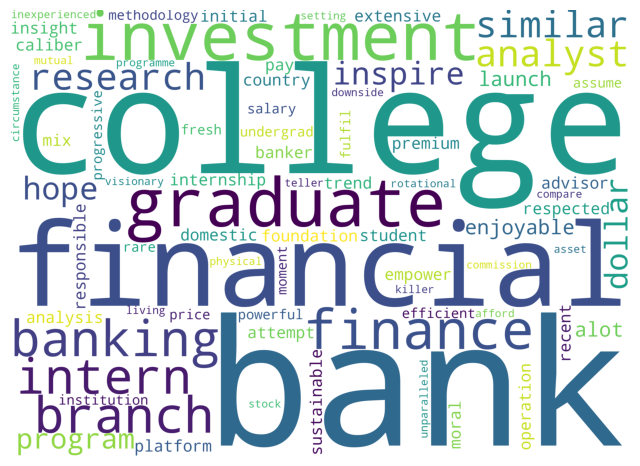


Wordcloud for topic: 1 



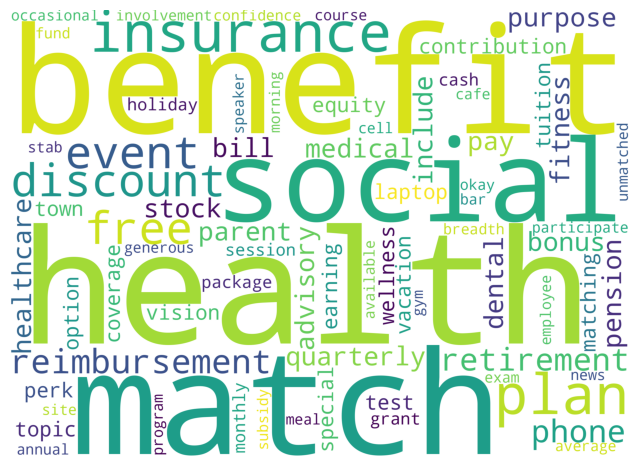


Wordcloud for topic: 2 



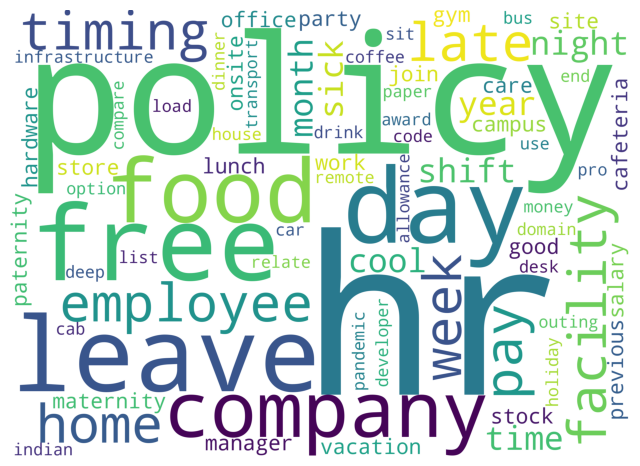


Wordcloud for topic: 3 



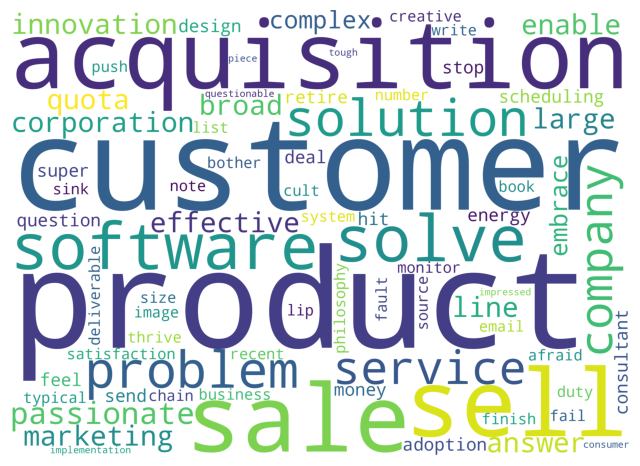


Wordcloud for topic: 4 



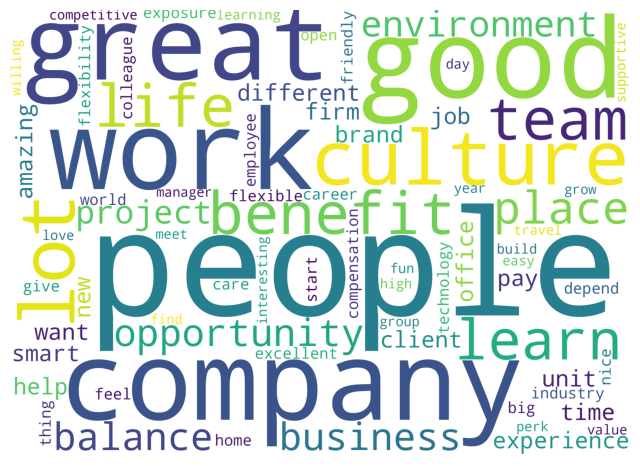


Wordcloud for topic: 5 



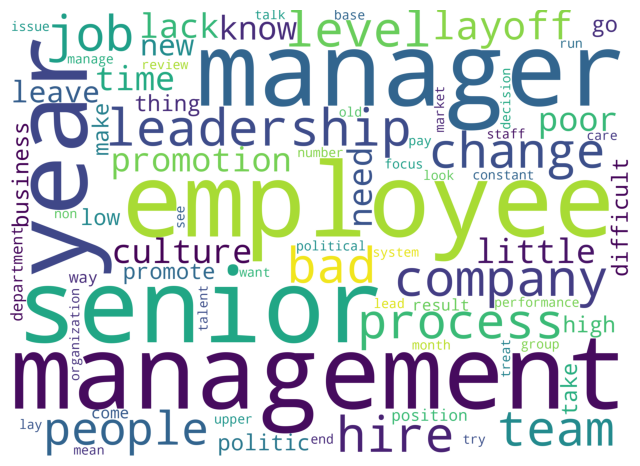


Wordcloud for topic: 6 



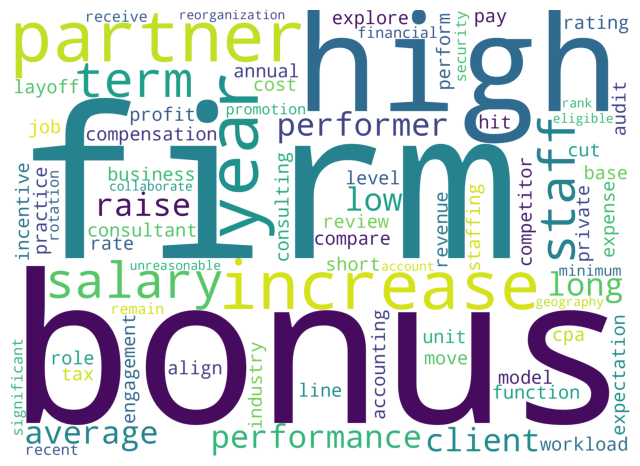


Wordcloud for topic: 7 



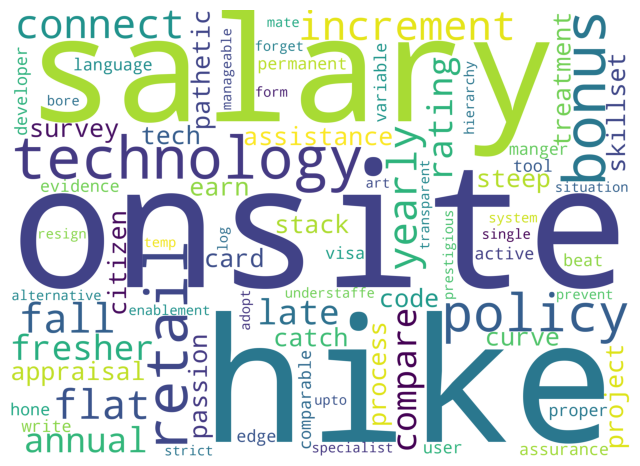


Wordcloud for topic: 8 



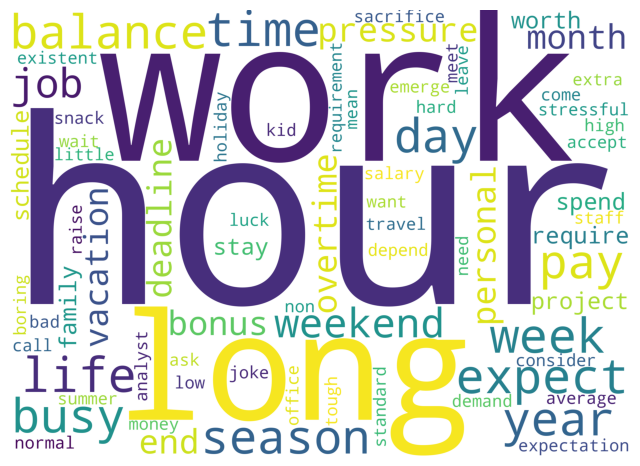


Wordcloud for topic: 9 



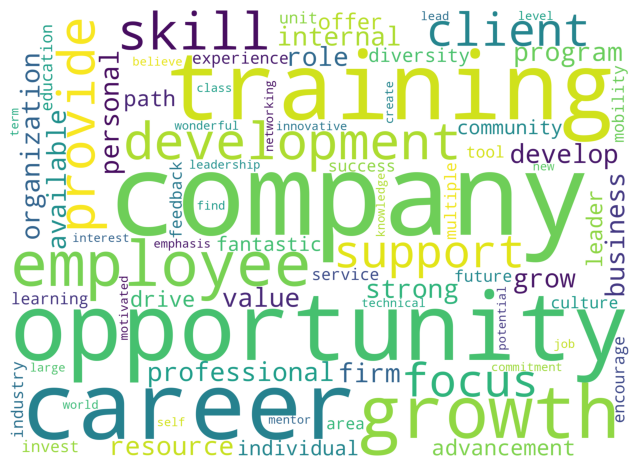

In [14]:
for topic in range(10):
    #plt.figure(figsize=(10,15))
    word_cloud(topic, lda_model)

<ipython-input-15-1d44694c3bd2>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'center')


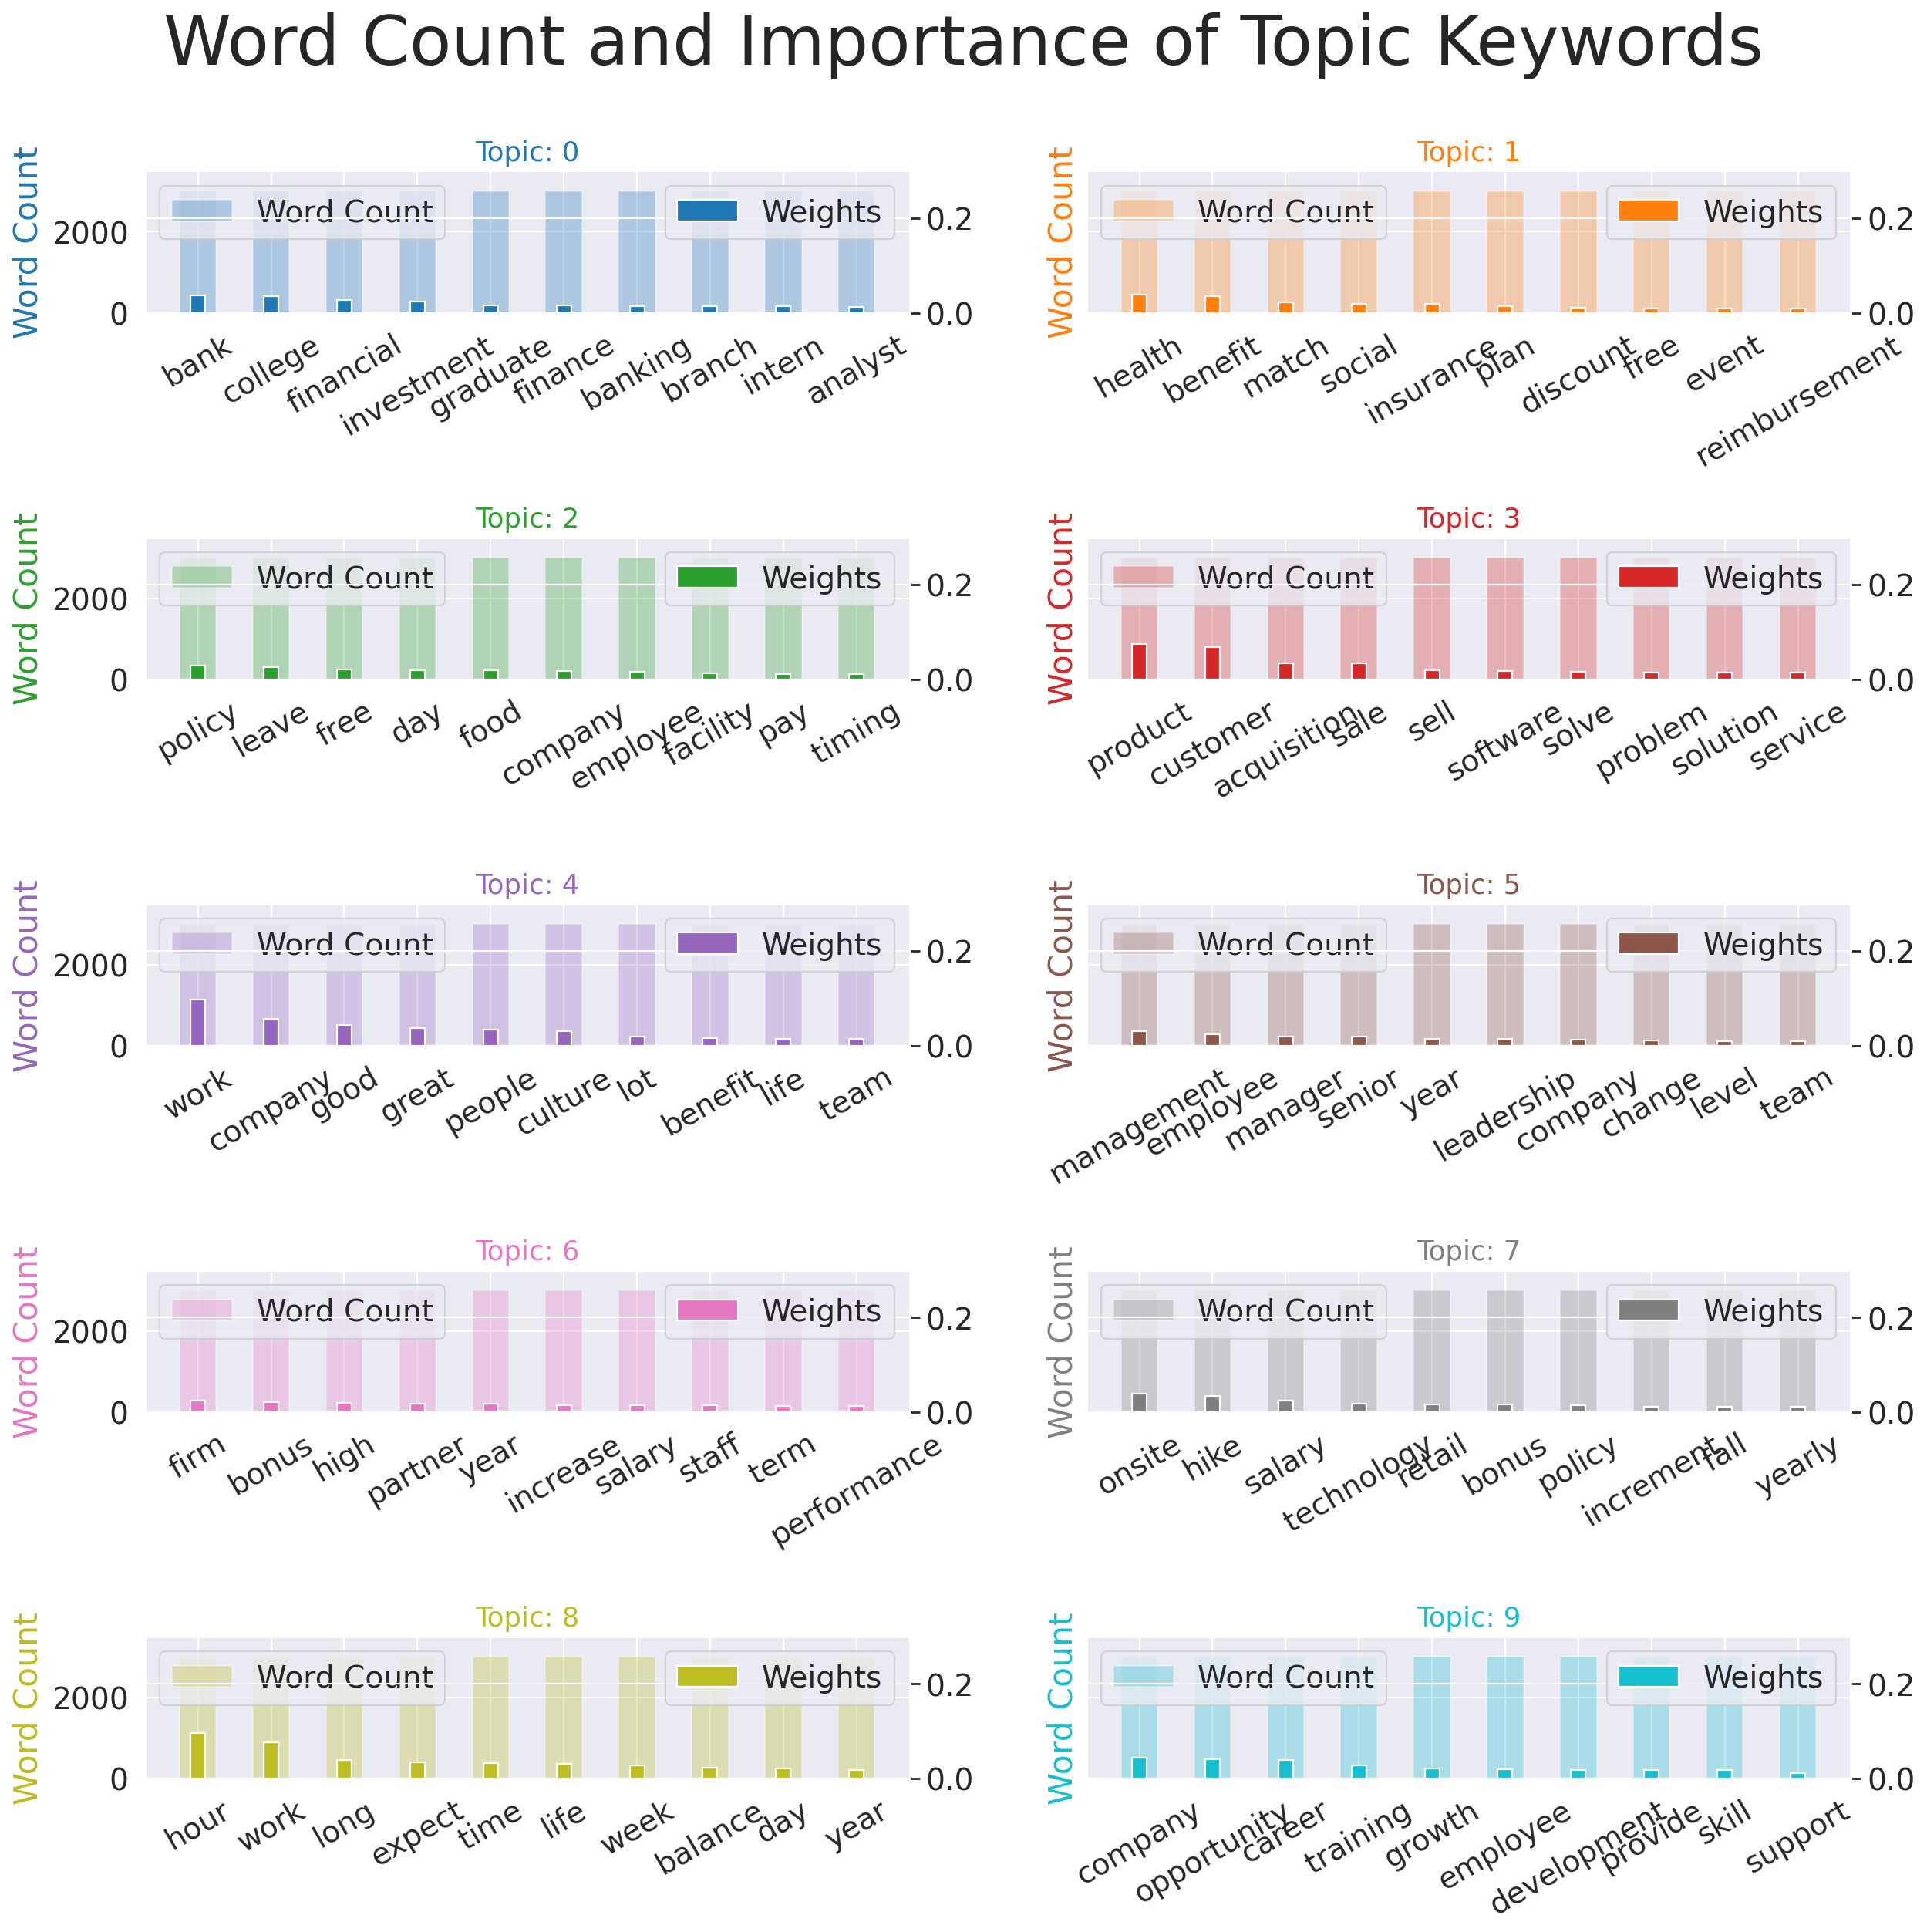

In [15]:
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
from collections import Counter
%matplotlib inline
topics = lda_model.show_topics(formatted=False, num_topics = 10)
data_flat = [w for w_list in bow for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(5, 2, figsize=(16,15), sharey=True, dpi=160) #setting the number of topics visualised
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height=3000, data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.3); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'center')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=40, y=1.05)
plt.show()

In [16]:
! pip install pyLDAvis

In [17]:
import pyLDAvis.gensim_models
import pyLDAvis
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, bow, dct) #giving the needed values to  generate the topics
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.282907  0.023682       1        1  37.366343
5     -0.191013 -0.011816       2        1  26.654880
9     -0.213427 -0.215452       3        1  13.728707
8     -0.075723  0.261191       4        1   5.231374
6     -0.001675  0.003732       5        1   4.983499
2      0.051905  0.149692       6        1   4.303274
1      0.171981  0.056807       7        1   2.136699
0      0.205271 -0.078938       8        1   1.974655
3      0.130459 -0.209679       9        1   1.959880
7      0.205128  0.020782      10        1   1.660689, topic_info=         Term          Freq         Total Category  logprob  loglift
42       work  10704.000000  10704.000000  Default  30.0000  30.0000
423   benefit   1786.000000   1786.000000  Default  29.0000  29.0000
626      hour   1319.000000   1319.000000  Default  28.0000  28.0000
129      good   4427.000000   4427.000000  Default  27.0000  27.0000
268     great   3706.000000   3706.000000  Default  26.0000  26.0000
...       ...           ...           ...      ...      ...      ...
178      code     29.766710     81.328322  Topic10  -4.9917   3.0928
576    rating     35.168216    142.067213  Topic10  -4.8250   2.7018
976   compare     36.065676    291.007238  Topic10  -4.7998   2.0099
1312     tech     28.307069    211.347223  Topic10  -5.0420   2.0875
79    process     24.229412    667.385803  Topic10  -5.1976   0.7821

[600 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
1487      9  0.997498  acquisition
823       2  0.988762       action
3303     10  0.926006       active
3311      6  0.075043     adoption
3311      9  0.862994     adoption
...     ...       ...          ...
67        4  0.123705         year
67        5  0.117059         year
67        6  0.042428         year
67        8  0.007668         year
549      10  0.988519       yearly

[1072 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 6, 10, 9, 7, 3, 2, 1, 4, 8])